In [80]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score



%matplotlib inline

In [6]:
Test = pd.read_csv('test_set.csv', sep=r'\s*,\s*')

In [7]:
Test.head()

,u - g,g - r,r - i,i - z,class
0,0.548959,0.525177,0.552252,0.592630,1
1,0.829393,0.748682,0.645658,0.663166,1
2,0.849061,0.731069,0.657099,0.634516,1
3,0.818500,0.696820,0.660580,0.607781,1
4,0.901861,0.762522,0.661220,0.641985,1


In [155]:
X_test = Test.drop(columns=['class'])
Y_test = Test['class']
X_test.head()


,u - g,g - r,r - i,i - z
0,0.548959,0.525177,0.552252,0.592630
1,0.829393,0.748682,0.645658,0.663166
2,0.849061,0.731069,0.657099,0.634516
3,0.818500,0.696820,0.660580,0.607781
4,0.901861,0.762522,0.661220,0.641985


In [171]:
Y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [141]:
features = ["u - g", "g - r", "r - i", "i - z"]

X = X_test[features]
z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 4)

EM.fit(X)

cluster = EM.predict(X)
cluster


array([1, 2, 2, ..., 0, 0, 0])

In [178]:


print("Score: ", silhouette_score(X, cluster))


Score:  0.36810233844155765


In [138]:
cluster = EM.predict(X_test)
cluster


array([1, 1, 1, ..., 1, 1, 1])

In [142]:
silhouette_score(X, cluster)

0.36810233844155765

In [137]:
cluster_p = EM.predict_proba(X_test)
cluster_p

array([[3.09113338e-05, 9.99616810e-01, 4.31389389e-06, 3.47964936e-04],
       [2.99032448e-06, 9.99690470e-01, 2.85648189e-04, 2.08911627e-05],
       [4.39574377e-06, 9.99644255e-01, 3.33844557e-04, 1.75044865e-05],
       ...,
       [2.07227981e-04, 9.80008146e-01, 6.99966724e-09, 1.97846191e-02],
       [1.04067986e-04, 9.92113828e-01, 2.78022808e-08, 7.78207655e-03],
       [7.67467369e-05, 9.92447109e-01, 4.42029366e-09, 7.47613955e-03]])

In [132]:
print(EM.lower_bound_)
print(EM.n_iter_)


-2.1437101977273016
15


In [122]:
EM.score(cluster_p)
EM.score_samples(cluster_p)

array([-5.35855596, -5.35762738, -5.35760151, ..., -5.40967146,
       -5.37824216, -5.3774448 ])

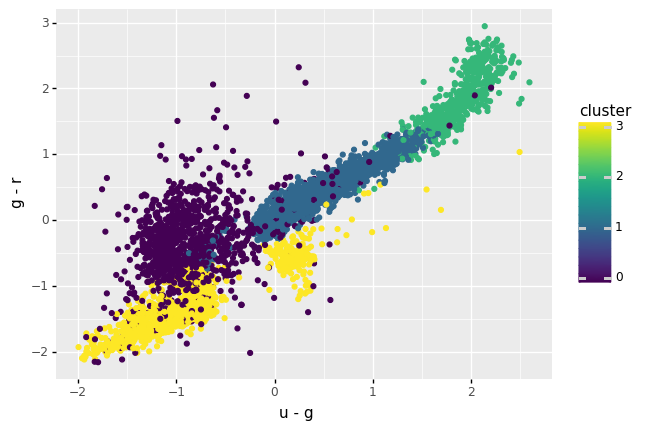

<ggplot: (8767666188659)>

In [233]:
X["cluster"] = cluster

(ggplot(X, aes(x = "u - g", y = "g - r", color = "cluster")) + geom_point())

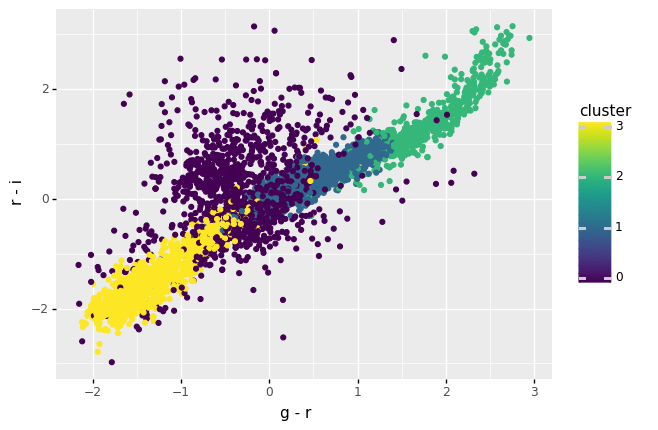

<ggplot: (8767650901378)>

In [234]:
(ggplot(X, aes(x = "g - r", y = "r - i", color = "cluster")) + geom_point())

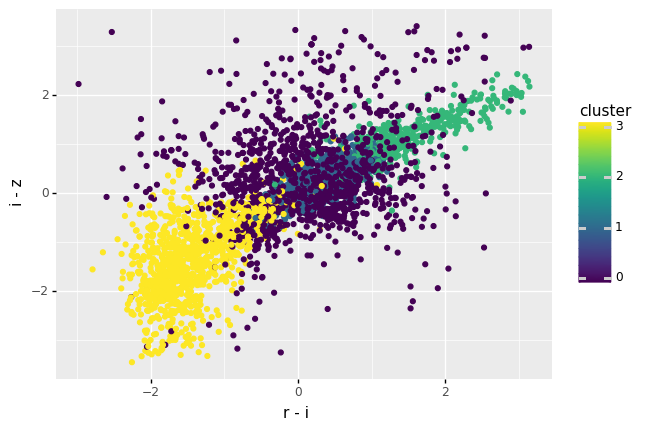

<ggplot: (8767681860301)>

In [235]:
(ggplot(X, aes(x = "r - i", y = "i - z", color = "cluster")) + geom_point())

In [237]:
correlations = X.corr(method='pearson')
correlations

,u - g,g - r,r - i,i - z,cluster
u - g,1.000000,0.901636,0.713851,0.553527,0.007556
g - r,0.901636,1.000000,0.856156,0.694305,-0.264233
r - i,0.713851,0.856156,1.000000,0.753376,-0.456588
i - z,0.553527,0.694305,0.753376,1.000000,-0.517074
cluster,0.007556,-0.264233,-0.456588,-0.517074,1.000000


<AxesSubplot:>

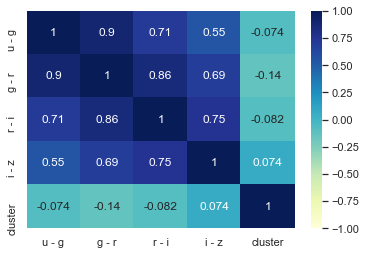

In [232]:
import seaborn as sns
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)

<AxesSubplot:>

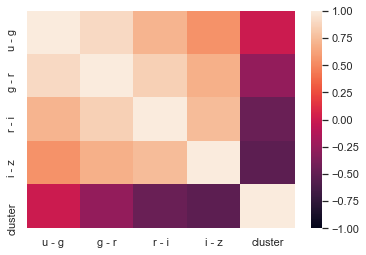

In [189]:
sns.heatmap(X.corr(), vmin=-1, vmax=1)

In [192]:
Test.groupby('class')['u - g'].mean()

class
1    0.591968
2    0.205695
3    0.280730
Name: u - g, dtype: float64

In [193]:
Test.groupby('class')['g - r'].mean()

class
1    0.552533
2    0.172258
3    0.363907
Name: g - r, dtype: float64

In [194]:
Test.groupby('class')['r - i'].mean()

class
1    0.569305
2    0.273830
3    0.504295
Name: r - i, dtype: float64

In [195]:
Test.groupby('class')['i - z'].mean()

class
1    0.560646
2    0.340237
3    0.540725
Name: i - z, dtype: float64

In [210]:
mean = X['u - g'].mean()
std = X['u - g'].std()


z_score1 = (X['u - g'] - mean)/std
z_score1.head()

0    0.524785
1    1.812853
2    1.903189
3    1.762818
4    2.145706
Name: u - g, dtype: float64

In [211]:
z_score1.mean() , z_score.std()

(-1.1055152036479482e-15, 1.0000000000000009)

<AxesSubplot:>

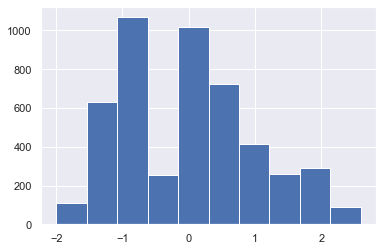

In [213]:
z_score1.hist()

In [214]:
mean = X['g - r'].mean()
std = X['g - r'].std()


z_score2 = (X['g - r'] - mean)/std
z_score2.head()

0    0.520830
1    1.662256
2    1.572304
3    1.397397
4    1.732933
Name: g - r, dtype: float64

In [215]:
z_score2.mean() , z_score.std()

(3.9224604535104723e-16, 1.0000000000000009)

<AxesSubplot:>

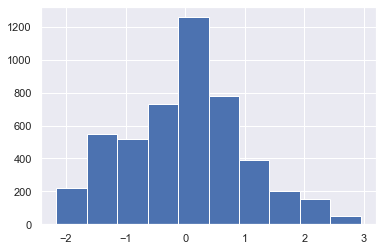

In [216]:
z_score2.hist()

In [217]:
mean = X['r - i'].mean()
std = X['r - i'].std()


z_score3 = (X['r - i'] - mean)/std
z_score3.head()

0    0.402752
1    0.974459
2    1.044485
3    1.065796
4    1.069711
Name: r - i, dtype: float64

In [218]:
z_score3.mean() , z_score.std()

(2.517141611563942e-16, 1.0000000000000009)

<AxesSubplot:>

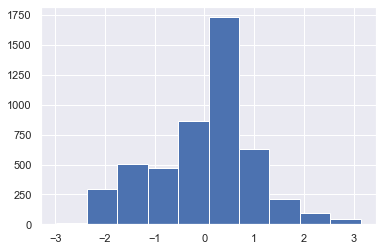

In [219]:
z_score3.hist()

In [220]:
mean = X['i - z'].mean()
std = X['i - z'].std()


z_score4 = (X['i - z'] - mean)/std
z_score4.head()

0    0.600661
1    1.084277
2    0.887843
3    0.704540
4    0.939049
Name: i - z, dtype: float64

In [221]:
z_score4.mean() , z_score.std()

(-3.890865489913431e-16, 1.0000000000000009)

<AxesSubplot:>

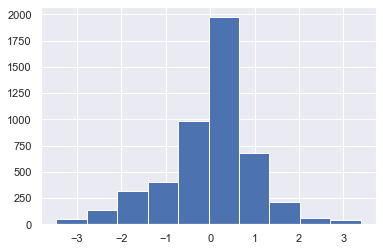

In [222]:
z_score4.hist()